In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from patsy import dmatrix # constructs design matrix
import statsmodels.api as sm

In [2]:
# Define the true regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [4]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 500)
y = reg(X) + np.random.normal(0, 5, 500)

In [5]:
X.shape, reg(X).shape, y.shape

((500,), (500,), (500,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

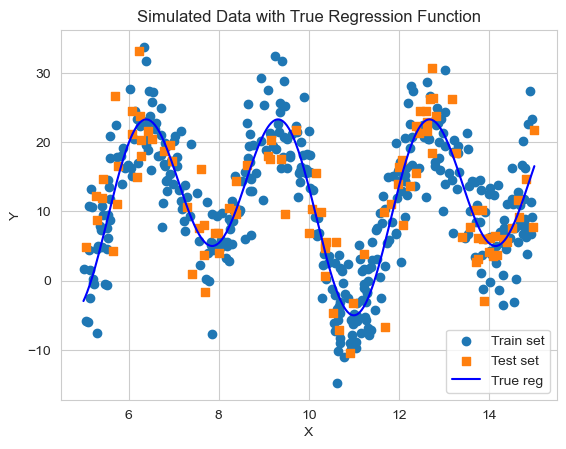

In [7]:
# Plot the training and testing points
plt.scatter(X_train, y_train, marker='o', label='Train set')
plt.scatter(X_test, y_test, marker='s', label='Test set')

# Plot the true regression curve
x_curve = np.linspace(5, 15, 500); y_curve = reg(x_curve)
plt.plot(x_curve, y_curve, c='blue', label='True reg')

plt.xlabel('X'); plt.ylabel('Y')
plt.legend()
plt.title('Simulated Data with True Regression Function')
# plt.grid(True)
plt.show()

## Fit a spline regresion model with degrees of freedom $k$

In [13]:
k = 10 # df
# computing the design matrix B for B-spline basis
X_spline = dmatrix(f"bs(X, df={k})", data={"X": X_train}, return_type='dataframe')
model = sm.OLS(y_train, X_spline).fit() # Fitting the model
# print(model.summary())

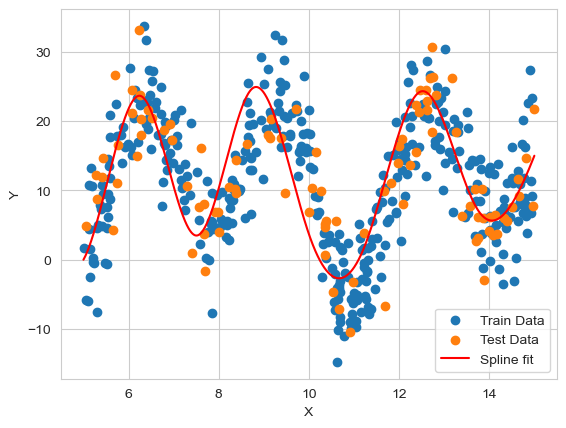

In [14]:
# Predict for new X values
X_new = np.linspace(5, 15, 1000)
X_new_spline = dmatrix(f"bs(X, df={k})", data={"X": X_new}, return_type='dataframe')
Y_pred = model.predict(X_new_spline)

# 5. Plot
plt.scatter(X_train, y_train, label='Train Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_new, Y_pred, c='r', label='Spline fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Computing train and test MSEs

In [15]:
k = 10 # df

# computing the design matrix B for B-spline basis
X_spline = dmatrix(f"bs(X, df={k}, include_intercept=False)", data={"X": X_train}, return_type='dataframe')
model = sm.OLS(y_train, X_spline).fit() # Fitting the model

X_spline_test = dmatrix(f"bs(X, df={k}, include_intercept=False)", data={"X": X_test}, return_type='dataframe')
y_pred_train = model.predict(X_spline)
y_pred_test = model.predict(X_spline_test)

mse_trn = mean_squared_error(y_train, y_pred_train)
mse_tst = mean_squared_error(y_test, y_pred_test)

print(f'df = {k}\nTrain MSE = {mse_trn}\nTest MSE = {mse_tst}')

df = 10
Train MSE = 23.916973396398163
Test MSE = 30.20489714969477


### Repeat the procedure $50$ times and report the avg MSE for various dfs, for Train and test data

In [16]:
Res = []
R = 50
H = [4,5,10,20,30,40,50]

for r in range(R):
    print(r, end = ' ')
    np.random.seed(r)
    # Generate data
    X = np.random.uniform(5, 15, 500)
    y = reg(X) + np.random.normal(0, 5, 500)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    errs = []
    for k in H:
        # k = 10 # df
        # computing the design matrix B for B-spline basis
        X_spline = dmatrix(f"bs(X, df={k}, include_intercept=False)", data={"X": X_train}, return_type='dataframe')
        model = sm.OLS(y_train, X_spline).fit() # Fitting the model

        X_spline_test = dmatrix(f"bs(X, df={k}, include_intercept=False)", data={"X": X_test}, return_type='dataframe')
        y_pred_train = model.predict(X_spline)
        y_pred_test = model.predict(X_spline_test)

        mse_trn = mean_squared_error(y_train, y_pred_train)
        mse_tst = mean_squared_error(y_test, y_pred_test)
        
        errs.append([mse_trn , mse_tst])
    
    Res.append(errs)

Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train MSE', 'Avg Test MSE'])
Res_df.insert(loc=0, column='k', value=H)
Res_df

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

,k,Avg Train MSE,Avg Test MSE
0,4,80.345389,84.778896
1,5,78.180259,83.009462
2,10,26.157863,53.234120
3,20,23.725015,63.818674
4,30,23.124129,65.929141
5,40,22.433837,68.874162
6,50,21.785922,70.888911


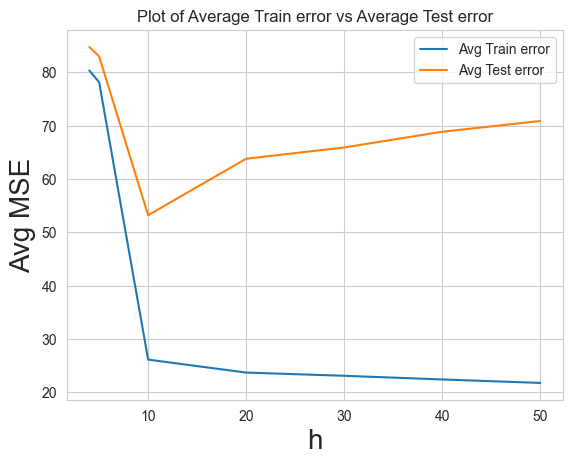

In [97]:
plt.plot(Res_df['h'], Res_df['Avg Train MSE'],label='Avg Train error')
plt.plot(Res_df['h'], Res_df['Avg Test MSE'],label='Avg Test error')
plt.xlabel('h', fontsize=20); plt.ylabel('Avg MSE', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()